## <font color=pink>피드백</font>

<font color=pink>
1. 페이지를 넘어다니면서 크롤링하는 과정을 반복문을 이용하면 더 간결하게 작성가능할 것 같습니다.<br>
2. 텍스트데이터에 영어로 된 텍스트가 많습니다. 크롤링하신 데이터가 다국어 데이터라면 보다 엄밀한 전처리기 사용 등이 필요하실 것 같습니다.(생각보다 영어로된 비중이 많네요)<br>
3. 텍스트데이터분석하신 결과를 즉, 혜영님이 분석하신 코드가 아닌 혜영님만의 분석 결과를 주석으로 적어주셨다면 좋았을 것 같습니다.<br>
4. 데이터의 양이 너무 적어서 훨씬 많은 데이터를 크롤링한 후 분석하셨다면 더 좋았을 것 같습니다.<br>
</font>

In [ ]:
#chrome 웹 스토어에서 확장 프로그램 중 하나인 Custom Cursor for Chrome-사용자 정의 커서 에 관한 리뷰를 크롤링하였다.
#EDA는 해당 확장 프로그램의 리뷰내용에서 가장 많이 언급된 단어를 barplot과 wordcloud로 시각화하여 나타냈다.

In [1]:
#셀레니움을 이용할 것이기에 필요한 패키지를 불러온다. 
import pandas as pd
import time
from selenium import webdriver

pd.set_option('display.max_rows',100)

In [2]:
#크롤링한 내용을 데이터프레임으로 만들 것이므로 data라는 하나의 데이터프레임을 만든다. 
data = pd.DataFrame(data=[], columns=['user_name','date','review'])

In [3]:
#정보를 크롤링할 웹사이트 url을 적어서 해당 웹사이트를 불러온다. 
driver = webdriver.Chrome("chromedriver.exe")
url = 'https://chrome.google.com/webstore/detail/custom-cursor-for-chrome/ogdlpmhglpejoiomcodnpjnfgcpmgale?hl=ko&'
driver.get(url)

In [5]:
#리뷰를 크롤링할 것이므로 해당 웹사이트의 리뷰 버튼을 클릭하도록 하는 코드를 만든다.
driver.find_element_by_xpath('//*[@id=":24"]/div/div').click()

In [6]:
#리뷰내용들은 스크롤 다운하면서 볼 수 있기에 scroll_down함수를 정의한다. 

def scroll_down(driver):
    driver.execute_script("window.scrollTo(0, 999999999999)")
    time.sleep(1)

In [7]:
# 스크롤 다운
scroll_down(driver)

In [8]:
#crawl이라는 함수를 정의하여 리뷰글 순서대로 리뷰글의 유저이름, 날짜, 리뷰내용을 크롤링한다.

def crawl(driver,data,k):
    user_names=driver.find_elements_by_css_selector('.comment-thread-displayname')
    dates=driver.find_elements_by_css_selector('.ba-Eb-Nf')
    reviews=driver.find_elements_by_css_selector('.ba-Eb-ba')
    for i in range(k):
        tmp=[]
        tmp.append(user_names[i].text)
        tmp.append(dates[i].text)
        tmp.append(reviews[i].text)
        tmp=pd.DataFrame(data=[tmp],columns=data.columns)
        data=pd.concat([data,tmp])
    return data

In [9]:
#일단 해당 웹사이트 리뷰화면의 첫 페이지를 쭉 크롤링해준다. 
#첫페이지의 리뷰글은 25개이므로 25개를 크롤링하였다. 

scroll_down(driver)
data1=crawl(driver,data,25)

In [10]:
#웹사이트 리뷰화면의 첫페이지의 크롤링이 끝났으면, 다음 페이지로 넘어가야하므로 '다음' 버튼을 클릭하기 위해서 
#'다음'버튼의 xpath를 복사해 driver.find_element_by_xpath를 통해 해당 xpath를 적어준다.

driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/div/div[3]/div[3]/div[3]/div/div/div/div[1]/div[2]/div[1]/div[2]/div[2]/a[2]').click()

In [11]:
#'다음'버튼을 통해서 리뷰의 2페이지로 넘어왔으므로 다시 스크롤 다운해주고 데이터 25개를 크롤링한다. 

scroll_down(driver)
data2=crawl(driver,data,25)

In [12]:
#이제는 3페이지로 넘어가기 위해 또다시 '다음'버튼의 xpath를 복사해 driver.find_element_by_xpath를 통해 해당 xpath를 적어준다. 

driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/div/div[3]/div[3]/div[3]/div/div/div/div[1]/div[2]/div[1]/div[2]/div[2]/a[2]').click()

In [13]:
#3페이지로 넘어왔기에 다시 리뷰 데이터 25개를 크롤링한다. 

scroll_down(driver)
data3=crawl(driver,data,25)

In [14]:
#크롤링한 data1,data2,data3를 합쳐서 data라는 데이터프레임이 최종적으로 완성되었다. 

data4=data1.append(data2,ignore_index=True)
data=data4.append(data3,ignore_index=True)

In [15]:
#최종적으로 구한 data라는 데이터프레임의 상위 60행을 출력해본다. 

data.reset_index(inplace=True,drop=True)
data.head(60)

,user_name,date,review
0,최인호,2019. 11. 3.,"여러 분, 제가 이 앱 사용에 대하여 자세히 알려 드릴게요.\n1. 이 앱을 설치합..."
1,JC GOO,2020. 12. 8.,커서 모양 없는데요??
2,권영배,2020. 10. 7.,감사합니다:D
3,최윤서,2020. 8. 22.,커서 모양이 없으면요...?
4,mong mong,2021. 6. 11.,"저는 이거 진짜 좋아요 \n크롬에서도, 네이버 웨일에서도 아주 잘 작동함!!!!!!..."
5,오민규,2020. 12. 18.,여기안에서만 사용가능한거라 그냥그래여 ㅎㅎ \n잠깐의 귀여움은 있네요 ㅎㅎ
6,엄친아 [엄청친절한아재],2019. 7. 25.,와!! 예쁘다!! 하고 설치했는데 자기들 홈페이에서 밖에 안됨;; \n심지어 크롬 ...
7,KYONG LEE,2021. 6. 1.,그롬내에서 는 다 되요
8,예현 EXACTLY,2020. 10. 27.,맞아요..........
9,제이크,2020. 3. 21.,"저는 웹스토어,새탭 제외한 모든페이지에서 다 됨(물론 크롬내에서)"


In [16]:
#이제 리뷰 데이터에서 가장 많이 나온 단어를 시각화해보자. 
#이러한 시각화를 위해 WordCloud를 이용하였다. 

from wordcloud import WordCloud
from konlpy.tag import Twitter
from nltk import FreqDist
import matplotlib.pyplot as plt

tw=Twitter()

C:\Users\User\anaconda\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [19]:
#먼저, 위에서 만든 data라는 데이터프레임을 csv파일에 저장해준다. 

csv_file=data.to_csv('google_review_crawl3.csv',encoding='EUC-KR')

In [20]:
#review_list라는 리스트에 data데이터프레임의 review컬럼에 해당하는 값을 넣어준다. 

review_list = []
for i in range(len(data)):
    review_list.append(data['review'].iloc[i])

In [21]:
#정규표현식을 이용하여 분석에 어긋나는, 즉, 시각화에 필요없는 불용어구를 제외해준다. 
#이러한 불용어구에는 특수문자와 의성어가 포함된다. 

import re
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [22]:
#review_list에서 불용어구를 제외한 결과를 review_result라는 리스트에 넣어준다. 

review_result= []

for i in review_list:
    tokens = re.sub(emoji_pattern,"",i)
    tokens = re.sub(han,"",tokens)
    review_result.append(tokens)

review_result = pd.DataFrame(review_result, columns=["comment"])

In [23]:
#명사만을 뽑아내기 위해서 get_noun이라는 함수를 정의하였다. 

from konlpy.tag import Twitter

def get_noun(review_txt):
    twitter = Twitter()
    noun = []
    
    if len(review_txt)>0:
        tw = twitter.pos(review_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun
 
review_result['token'] = review_result['comment'].apply(lambda x: get_noun(x)) 

In [24]:
import matplotlib.pyplot as plt

from matplotlib import font_manager

font_fname = 'C:/Users/User/NanumGothic.ttf'

font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

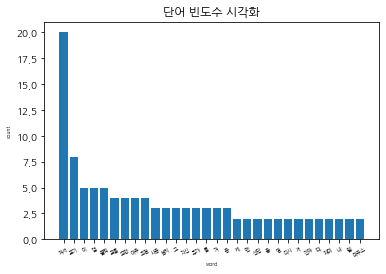

{'커서': 20, '크기': 8, '이': 5, '앱': 5, '클릭': 5, '크롬': 4, '모양': 4, '아주': 4, '조절': 4, '사용': 3, '설치': 3, '그': 3, '자신': 3, '추가': 3, '를': 3, '거': 3, '용': 3, '제': 2, '맨': 2, '상단': 2, '중': 2, '밑': 2, '다시': 2, '저': 2, '진짜': 2, '때': 2, '재미': 2, '내': 2, '웹': 2, '마우스': 2}


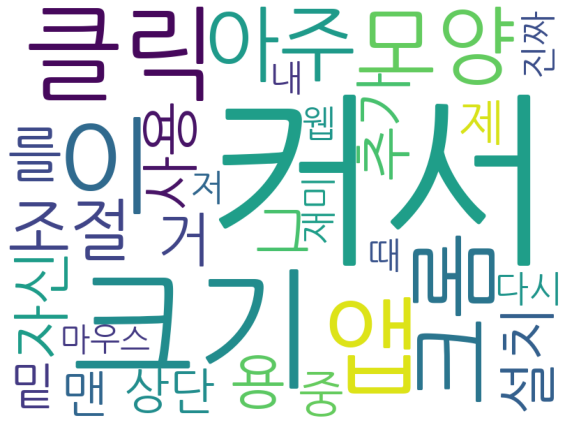

In [25]:
#필요한 패키지들을 불러오고, 단어 빈도수 상위 30개를 시각화하는 wordcloud를 그려준다. 

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pylab as plt
import numpy as np

noun_list = []
for i in range(len(review_result)):
    for j in range(len(review_result['token'].iloc[i])):
        noun_list.append(review_result['token'].iloc[i][j])
        
counts = Counter(noun_list)
tags = counts.most_common(30)

#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})
for i in range(len(tags)):
    word = tags[i][0]
    count = tags[i][1]
    
    insert_data = pd.DataFrame({'word':[word],
                                'count':[count]})
    test = test.append(insert_data)

test.index = range(len(test))

index = np.arange(len(test))
plt.bar(index,test['count'].tolist() )
plt.xlabel('word', fontsize=5)
plt.ylabel('count', fontsize=5)
plt.xticks(index, test['word'].tolist(), fontsize=5, rotation=30)
plt.title('단어 빈도수 시각화')
plt.show()

#wordcloud
wc = WordCloud(font_path='C:/Users/User/NanumGothic.ttf',background_color='white',width=800, height=600)

print(dict(tags))
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()